<h2 align="center">  Machine Lerning Predição De Preços De Carros<h2>

#### Aspirante a Cientista de Dados Jr.: Karina Gonçalves Soares

#### Links de estudo:

* [Projeto de Aprendizado de máquina](https://medium.com/@furkankizilay/end-to-end-machine-learning-project-using-fastapi-streamlit-and-docker-6fda32d25c5d)
* [Repositório](https://github.com/EddyGiusepe/FastAPI/blob/main/4_End-to-End_ML_FastAPI_Streamlit_Docker/Machine_Learning_to_Cars.ipynb)

#### Neste artigo, desenvolveremos um projeto de aprendizado de máquina de ponta a ponta com 11 etapas em nosso próprio local. Após isso, vamos criar uma API com FastAPI, depois de criar a interface com o auxílio do Streamlit, vamos dockerizar nosso projeto.

#### 1. Carregamento de dados
#### 2. Engenharia de recursos
#### 3. Limpeza de dados
#### 4. Remoção de Outliers
#### 5. Visualização de dados (relação entre variáveis)
#### 6. Extraindo dados de treinamento
#### 7. Codificação
#### 8. Construir um modelo
#### 9. Criar API com FastAPI
#### 10. Criando uma interface web para o modelo criado com Streamlit.
#### 11. Dockerize


In [13]:
#%pip install pandas 

In [14]:
import pandas as pd

In [15]:
# Abrindo arquivo para leitura

df = pd.read_csv('cars.csv')
df.head()

,name,year,Price,kms_driven,fuel_type,company
0,Hyundai Santro Xing,2007,80000,45000,Petrol,Hyundai
1,Mahindra Jeep CL550,2006,425000,40,Diesel,Mahindra
2,Hyundai Grand i10,2014,325000,28000,Petrol,Hyundai
3,Ford EcoSport Titanium,2014,575000,36000,Diesel,Ford
4,Ford Figo,2012,175000,41000,Diesel,Ford


## Engenharia de recursos
#### Adicionar novo recurso para o nomee da empresa.

In [16]:
df["company"] = df.name.apply(lambda x: x.split(" ")[0])
df.head()

,name,year,Price,kms_driven,fuel_type,company
0,Hyundai Santro Xing,2007,80000,45000,Petrol,Hyundai
1,Mahindra Jeep CL550,2006,425000,40,Diesel,Mahindra
2,Hyundai Grand i10,2014,325000,28000,Petrol,Hyundai
3,Ford EcoSport Titanium,2014,575000,36000,Diesel,Ford
4,Ford Figo,2012,175000,41000,Diesel,Ford


## Limpeza de dados
#### year tem muitos valores não anuais.

In [17]:
df.info('year')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   year        816 non-null    int64 
 2   Price       816 non-null    int64 
 3   kms_driven  816 non-null    int64 
 4   fuel_type   816 non-null    object
 5   company     816 non-null    object
dtypes: int64(3), object(3)
memory usage: 38.4+ KB


In [18]:
# Gerando valores aleatórios para análisar o DataFrame.

visualizando_valores_aleatorios = df.sample(n=10, replace=False)
print(visualizando_valores_aleatorios)

                    name  year    Price  kms_driven fuel_type   company
548     Mahindra Jeep MM  2004   424000         383    Diesel  Mahindra
465      Honda Mobilio S  2014   399000       44000    Diesel     Honda
626        Jaguar XF 2.2  2013  2190000       29000    Diesel    Jaguar
619      Hyundai Eon Era  2012   188000       38000    Petrol   Hyundai
422         BMW 5 Series  2011  1299000       49000    Diesel       BMW
397   Mahindra XUV500 W8  2012   560000      100000    Diesel  Mahindra
195  Maruti Suzuki Wagon  2009   135000       45000    Petrol    Maruti
678    Audi A3 Cabriolet  2015  3100000       12516    Petrol      Audi
91       Maruti Suzuki A  2011   189500       12500    Petrol    Maruti
288        Mini Cooper S  2013  1891111       13000    Petrol      Mini


In [19]:
# Observamos que a SÉRIE --> "year" tem valores que não são anos (year). Vamos eliminar eles:

df['year']. value_counts()


year
2015    111
2013     94
2014     92
2012     75
2016     74
2011     59
2009     54
2017     53
2010     43
2018     30
2006     22
2007     19
2019     18
2008     16
2005     13
2003     13
2004     12
2000      7
2001      5
2002      4
1995      2
Name: count, dtype: int64

In [20]:
# Podemos verificar também assim:
df['year'].unique()

array([2007, 2006, 2014, 2012, 2013, 2016, 2015, 2010, 2017, 2008, 2018,
       2011, 2019, 2009, 2005, 2000, 2003, 2004, 1995, 2002, 2001])

In [21]:
print('Verificando o Type: ', type(df['year'].iloc[0]))

Verificando o Type:  <class 'numpy.int64'>


In [22]:
# Trabalhamos com uma copia:
df2 = df.copy()

In [23]:
# Criando um novo Data Frame apenas com as linhas desejadas
# True, se todos os carateres da string forem numéricos:


df2 = df2[df2["year"].str.isnumeric()] 
df2

AttributeError: Can only use .str accessor with string values!

In [ ]:
# Convertendo a coluna year para inteiro:

df2['year'] = df2['year'].astype(int)

In [ ]:
# Agora sim, todos são números:

print("vejamos novamente: ", df2["year"].unique())

vejamos novamente:  [2007 2006 2018 2014 2015 2012 2013 2016 2010 2017 2008 2011 2019 2009
 2005 2000 2003 2004 1995 2002 2001]


In [ ]:
# Eliminamos na coluna/série "Price" a palavra: Ask For Price, assim:

df2 = df2[df2["Price"] != "Ask For Price"]
df2.Price

0        80,000
1      4,25,000
3      3,25,000
4      5,75,000
6      1,75,000
         ...   
837    3,00,000
838    2,60,000
839    3,90,000
840    1,80,000
841    1,60,000
Name: Price, Length: 819, dtype: object

In [ ]:
# Fazemos os reset do index:

df2 = df2.reset_index(drop=True)
df2.head()

,name,year,Price,kms_driven,fuel_type,company
0,Hyundai Santro Xing XO eRLX Euro III,2007,"80,000","45,000 kms",Petrol,Hyundai
1,Mahindra Jeep CL550 MDI,2006,"4,25,000",40 kms,Diesel,Mahindra
2,Hyundai Grand i10 Magna 1.2 Kappa VTVT,2014,"3,25,000","28,000 kms",Petrol,Hyundai
3,Ford EcoSport Titanium 1.5L TDCi,2014,"5,75,000","36,000 kms",Diesel,Ford
4,Ford Figo,2012,"1,75,000","41,000 kms",Diesel,Ford


In [ ]:
# Vejamos o método .info():
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 819 entries, 0 to 818
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        819 non-null    object
 1   year        819 non-null    int64 
 2   Price       819 non-null    object
 3   kms_driven  819 non-null    object
 4   fuel_type   816 non-null    object
 5   company     819 non-null    object
dtypes: int64(1), object(5)
memory usage: 38.5+ KB


In [ ]:
# A coluna Price tem vírgulas em seus preços e está como object:
df2.Price = df2.Price.str.replace(",", "").astype(int) # No final converte para inteiro

df2.head()

,name,year,Price,kms_driven,fuel_type,company
0,Hyundai Santro Xing XO eRLX Euro III,2007,80000,"45,000 kms",Petrol,Hyundai
1,Mahindra Jeep CL550 MDI,2006,425000,40 kms,Diesel,Mahindra
2,Hyundai Grand i10 Magna 1.2 Kappa VTVT,2014,325000,"28,000 kms",Petrol,Hyundai
3,Ford EcoSport Titanium 1.5L TDCi,2014,575000,"36,000 kms",Diesel,Ford
4,Ford Figo,2012,175000,"41,000 kms",Diesel,Ford


In [ ]:
# Verificando o type da coluna Price
type(df2["Price"].iloc[0])

numpy.int64

In [ ]:
# A coluna "kms_driven" tem valores de objeto com kms no passado:
print(df2[df2["kms_driven"].isna()])

Empty DataFrame
Columns: [name, year, Price, kms_driven, fuel_type, company]
Index: []


In [ ]:
# Como observamos, não tem valores nan, mas tem duas linhas 'Petrol':
df2["kms_driven"].isnull().sum()

0

In [ ]:
# Assim verificamos, também, que não temos valores MISSING (NaN):
df2[df2["kms_driven"].isna()]

,name,year,Price,kms_driven,fuel_type,company


In [ ]:
# Este trecho de código pega apenas a PRIMEIRA posição de string (get(0)) e logo substitue a vírgula por nada:
df2["kms_driven"] = df2["kms_driven"].str.split(" ").str.get(0).str.replace(',', "")

In [ ]:
# comparando df2 com o df2 anterior e vendo a limpeza nos Dados:
df2.head()


,name,year,Price,kms_driven,fuel_type,company
0,Hyundai Santro Xing XO eRLX Euro III,2007,80000,45000,Petrol,Hyundai
1,Mahindra Jeep CL550 MDI,2006,425000,40,Diesel,Mahindra
2,Hyundai Grand i10 Magna 1.2 Kappa VTVT,2014,325000,28000,Petrol,Hyundai
3,Ford EcoSport Titanium 1.5L TDCi,2014,575000,36000,Diesel,Ford
4,Ford Figo,2012,175000,41000,Diesel,Ford


In [ ]:
type(df2['kms_driven'].iloc[0])

str

In [ ]:
# Logo convertemos a numérico: 
df2 = df2[df2["kms_driven"].str.isnumeric()]

In [ ]:
pd.options.mode.chained_assignment = None  # desabilitando o aviso

In [ ]:
df2["kms_driven"] = df2["kms_driven"].astype(int) 

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 817 entries, 0 to 816
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        817 non-null    object
 1   year        817 non-null    int64 
 2   Price       817 non-null    int64 
 3   kms_driven  817 non-null    int64 
 4   fuel_type   816 non-null    object
 5   company     817 non-null    object
dtypes: int64(3), object(3)
memory usage: 44.7+ KB


In [ ]:
# A coluna 'fuel_type' tem valores nan:
print("Na coluna 'fuel_type' observamos um valor NaN: ")
df2[df2["fuel_type"].isna()]

Na coluna 'fuel_type' observamos um valor NaN: 


,name,year,Price,kms_driven,fuel_type,company
128,Toyota Corolla,2009,275000,26000,NaN,Toyota


In [ ]:
# Selecionamos as linhas que não tenham NaN:
df2 = df2[~df2["fuel_type"].isna()]
df2.head()

,name,year,Price,kms_driven,fuel_type,company
0,Hyundai Santro Xing XO eRLX Euro III,2007,80000,45000,Petrol,Hyundai
1,Mahindra Jeep CL550 MDI,2006,425000,40,Diesel,Mahindra
2,Hyundai Grand i10 Magna 1.2 Kappa VTVT,2014,325000,28000,Petrol,Hyundai
3,Ford EcoSport Titanium 1.5L TDCi,2014,575000,36000,Diesel,Ford
4,Ford Figo,2012,175000,41000,Diesel,Ford


In [ ]:
# Mudança de nomes de carros. Mantendo apenas as três primeiras palavras:
df2['name'] = df2['name'].str.split().str.slice(start=0, stop=3).str.join(" ")
df2.head()

,name,year,Price,kms_driven,fuel_type,company
0,Hyundai Santro Xing,2007,80000,45000,Petrol,Hyundai
1,Mahindra Jeep CL550,2006,425000,40,Diesel,Mahindra
2,Hyundai Grand i10,2014,325000,28000,Petrol,Hyundai
3,Ford EcoSport Titanium,2014,575000,36000,Diesel,Ford
4,Ford Figo,2012,175000,41000,Diesel,Ford


Redefinindo o índice dos dados finais limpos:

In [ ]:
df2 = df2.reset_index(drop=True)

Salvando nossos Dados Limpos:

In [ ]:
df2.to_csv('cars.csv', index=False)

In [ ]:
df2.describe(include="all")

,name,year,Price,kms_driven,fuel_type,company
count,816,816.000000,8.160000e+02,816.000000,816,816
unique,254,NaN,NaN,NaN,3,25
top,Maruti Suzuki Swift,NaN,NaN,NaN,Petrol,Maruti
freq,51,NaN,NaN,NaN,428,221
mean,NaN,2012.444853,4.117176e+05,46275.531863,NaN,NaN
std,NaN,4.002992,4.751844e+05,34297.428044,NaN,NaN
min,NaN,1995.000000,3.000000e+04,0.000000,NaN,NaN
25%,NaN,2010.000000,1.750000e+05,27000.000000,NaN,NaN
50%,NaN,2013.000000,2.999990e+05,41000.000000,NaN,NaN
75%,NaN,2015.000000,4.912500e+05,56818.500000,NaN,NaN


## Remoção de Outliers

Eliminamos os preços discrepantes:

6e6 representa 6 milhões em notação científica (6 vezes 10 elevado a 6).
Estamos eliminando as linhas da coluna Price onde o valor é menor que 6 milhoẽs e estamos gerando um novo índice.

In [ ]:
df2 = df2[df2['Price']<6e6].reset_index(drop=True)

df2

,name,year,Price,kms_driven,fuel_type,company
0,Hyundai Santro Xing,2007,80000,45000,Petrol,Hyundai
1,Mahindra Jeep CL550,2006,425000,40,Diesel,Mahindra
2,Hyundai Grand i10,2014,325000,28000,Petrol,Hyundai
3,Ford EcoSport Titanium,2014,575000,36000,Diesel,Ford
4,Ford Figo,2012,175000,41000,Diesel,Ford
...,...,...,...,...,...,...
810,Maruti Suzuki Ritz,2011,270000,50000,Petrol,Maruti
811,Tata Indica V2,2009,110000,30000,Diesel,Tata
812,Toyota Corolla Altis,2009,300000,132000,Petrol,Toyota
813,Tata Zest XM,2018,260000,27000,Diesel,Tata


## Visualização de dados

Verificando a relação da Empresa com o Preço.

In [ ]:
df2['company'].unique()

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

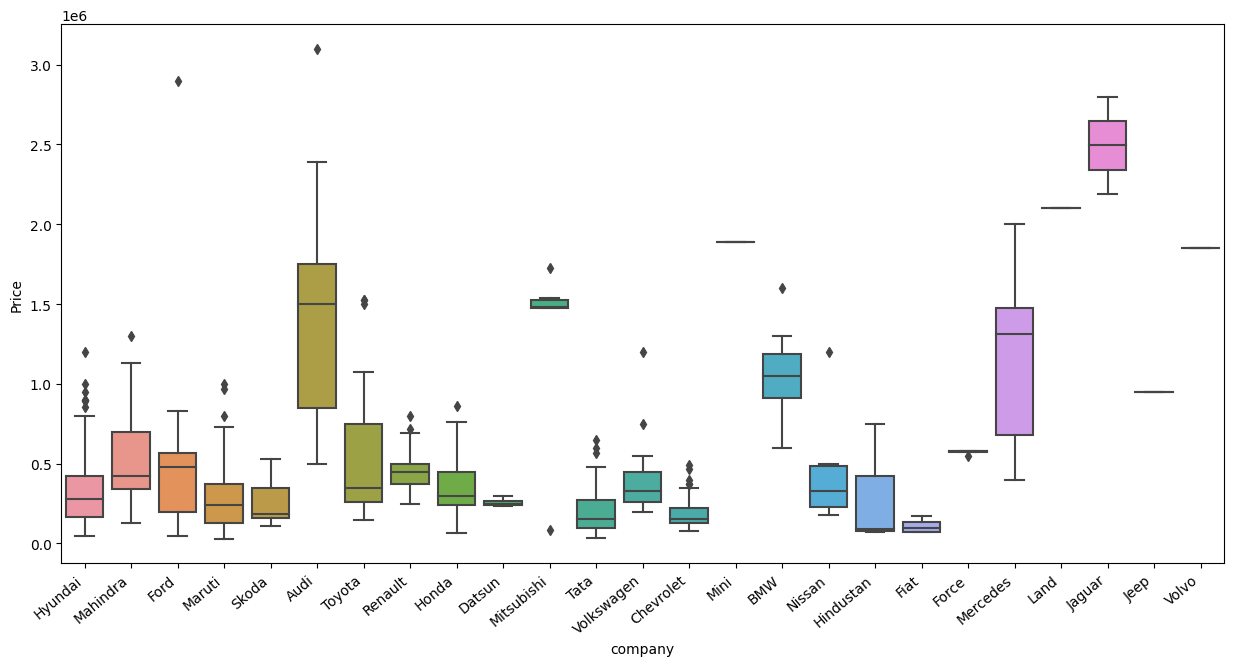

In [ ]:
plt.subplots(figsize=(15,7))
ax = sns.boxplot(x='company', y='Price', data=df2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

Verificando a relação do Ano com o Preço:

In [ ]:
import warnings 
warnings.filterwarnings("ignore",)

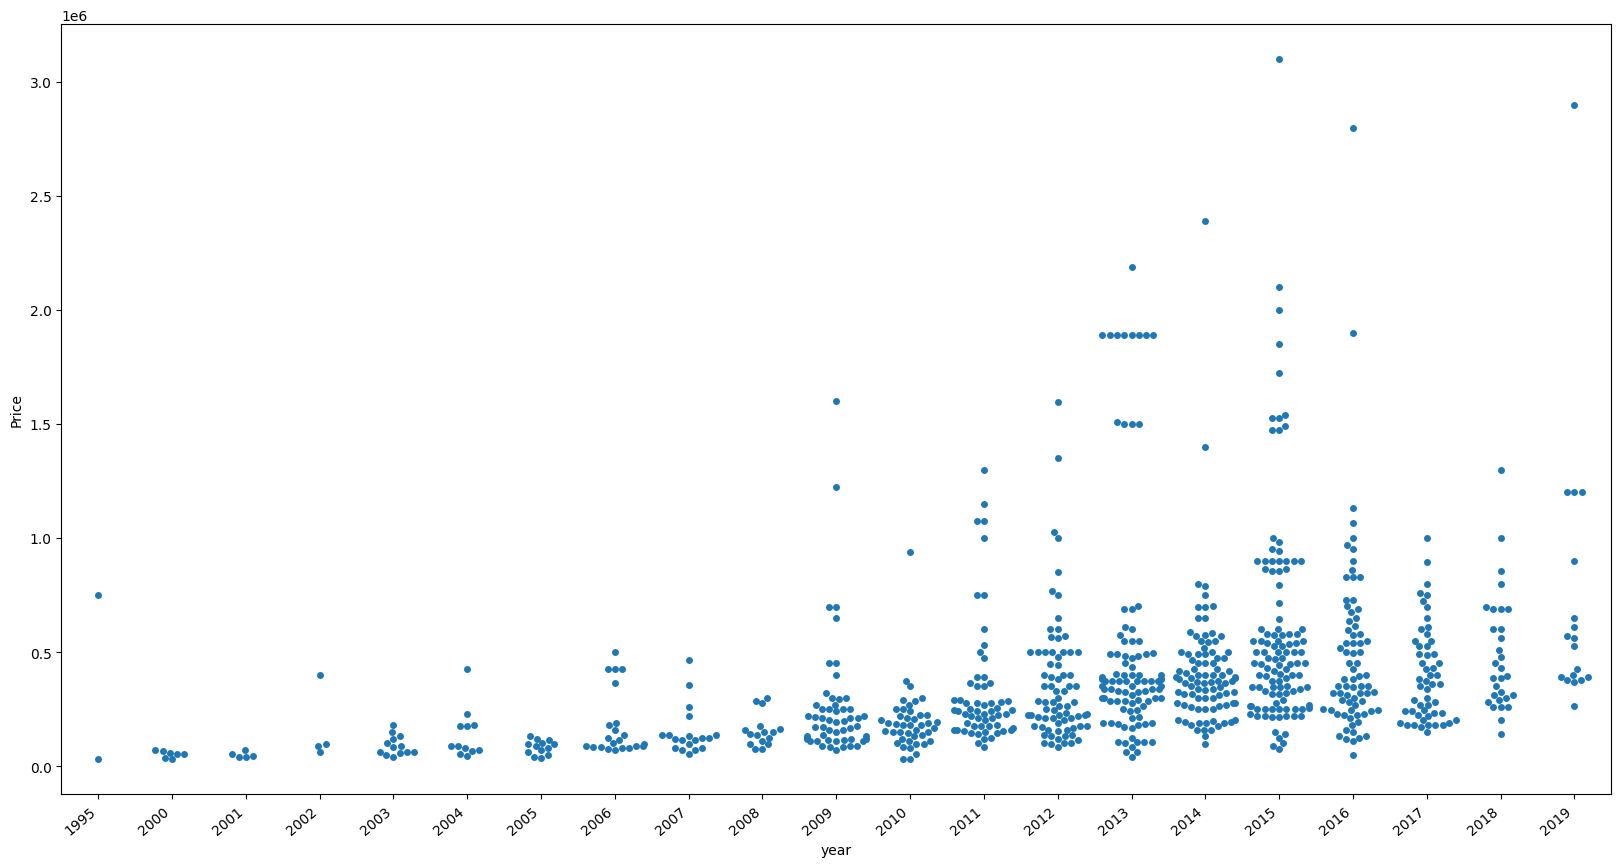

In [ ]:
# Gráfico de enxame

plt.subplots(figsize=(20,10))
ax = sns.swarmplot(x='year', y='Price', data=df2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

Verificando a relação de kms_driven com Price:

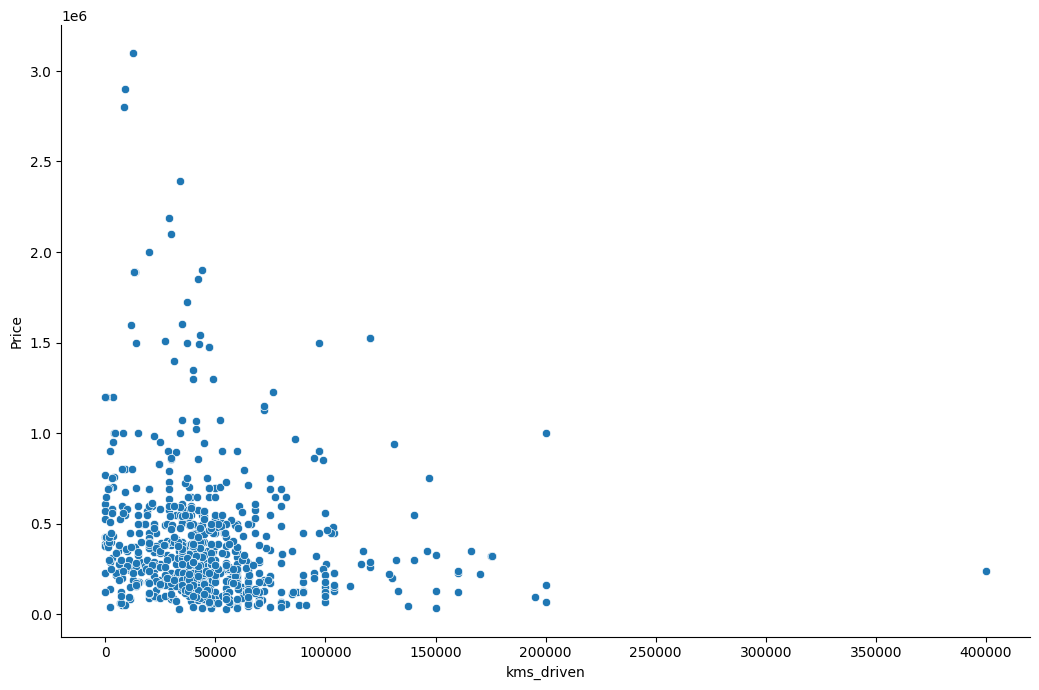

In [ ]:
# Grafico de dispersão
sns.relplot(x='kms_driven',y='Price', data=df2, height=7, aspect=1.5)
plt.show()

Verificando a relação do Tipo de Combustível com o Preço:

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

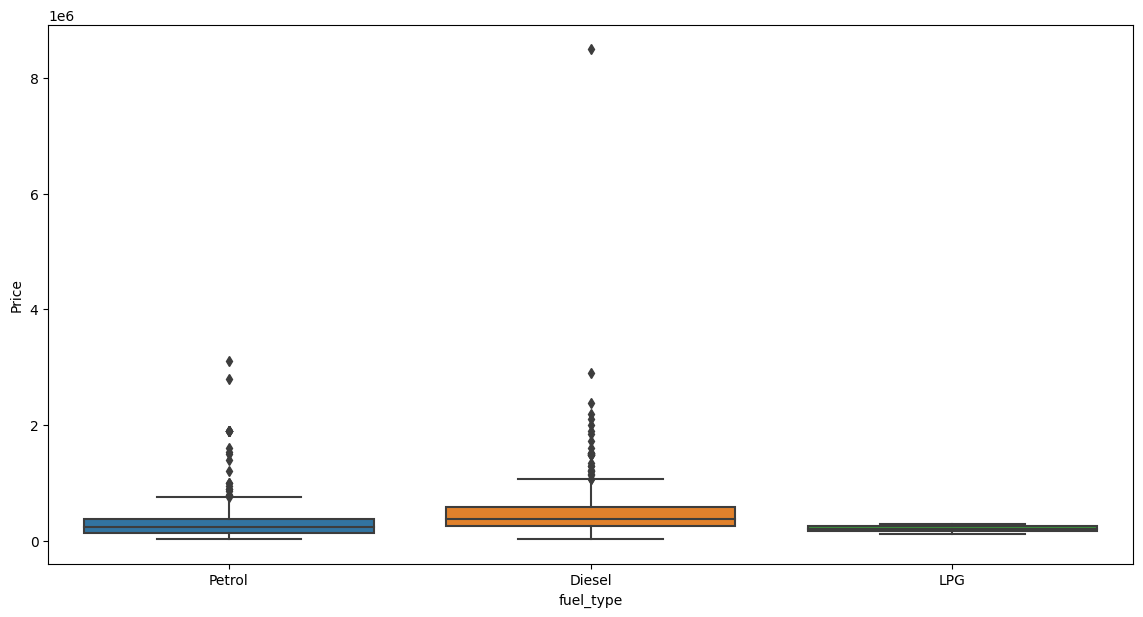

In [30]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='fuel_type', y='Price', data=df2)
plt.show()

Relação de Preço com Tipo de Combustível, Ano e Empresa mista:

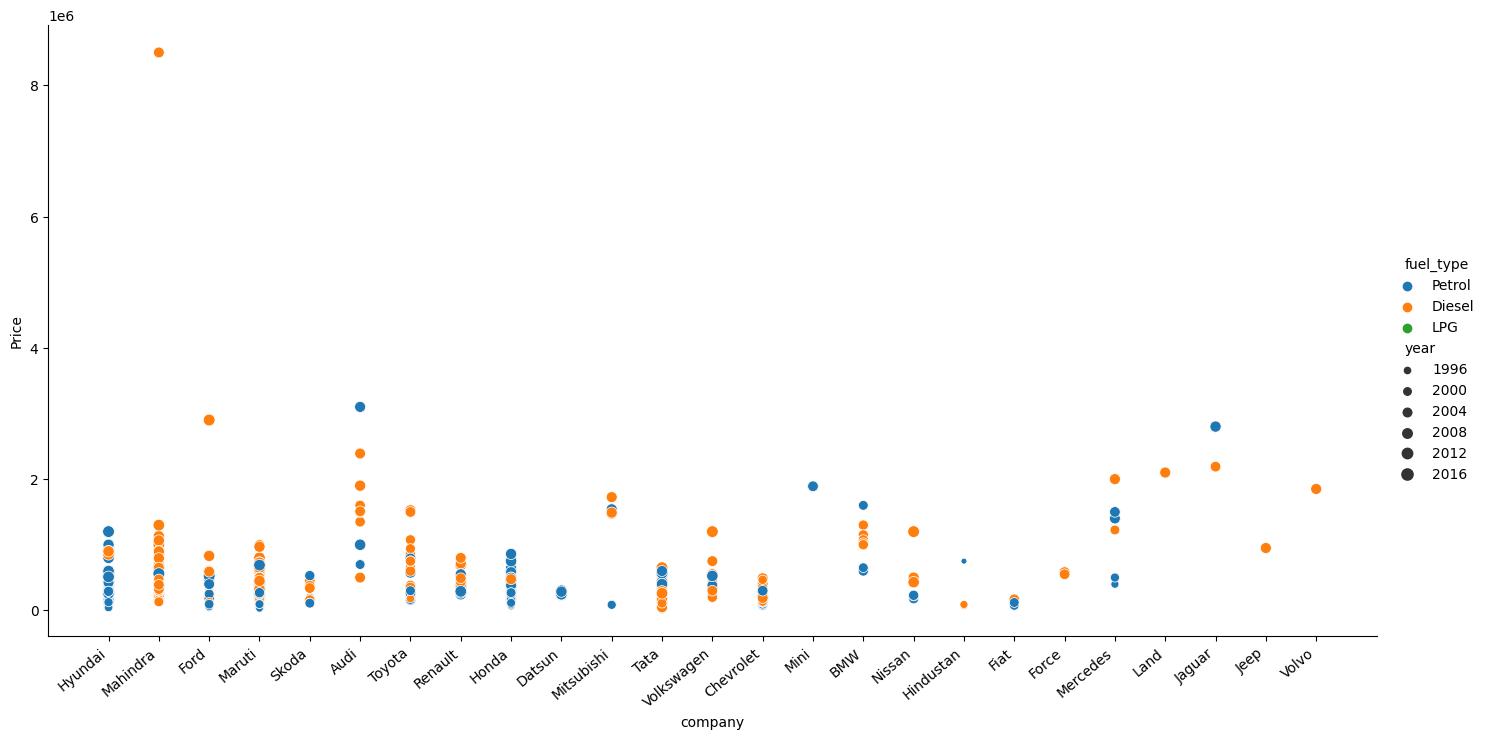

In [31]:
ax = sns.relplot(x='company', y='Price', data=df2, hue='fuel_type', size='year',  height=7, aspect=2)
ax.set_xticklabels(rotation=40, ha='right')
plt.show()

## Extraindo dados de treinamento

In [32]:
x = df2[['name', 'company', 'year', 'kms_driven','fuel_type']] # Minhas features
y = df2['Price'] # Meu alvo/target
x

,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,36000,Diesel
4,Ford Figo,Ford,2012,41000,Diesel
...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,50000,Petrol
812,Tata Indica V2,Tata,2009,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,132000,Petrol
814,Tata Zest XM,Tata,2018,27000,Diesel


Aplicando train_test_split

In [36]:
#%pip install sklearn.model

In [38]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [39]:
x_train.shape

(652, 5)

In [40]:
x_test.shape

(164, 5)

In [41]:
y_train.shape

(652,)

In [42]:
y_test.shape

(164,)